# Статистический анализ данных сервиса аренды самокатов GoFast

**Описание проекта**: Сервису аренды самокатов GoFast необходимо проанализировать данные о пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться
с подпиской и без. 

**Цель исследования**: Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Ход исследования:**

- *Шаг 1.* Загрузка данных
- *Шаг 2.* Предобработка данных
- *Шаг 3.* Исследовательский анализ данных
- *Шаг 4.* Объединение данных
- *Шаг 5.* Подсчёт выручки
- *Шаг 6.* Проверка гипотез
- *Шаг 7.* Выводы

**Общий вывод**: Анализ данных сервиса аренды самокатов GoFast может быть полезным для всех участников рынка, включая работников сервиса и самих пользователей, и поможет в принятии более обоснованных решений по изменению сервиса в будущем. 

**Описание данных**

- **Файл `users_go.csv`**
    - `user_id` - уникальный идентификатор пользователя;
    - `name`- имя пользователя;
    - `age` - возраст;
    - `city` - город;
    - `subscription_type` - тип подписки (free, ultra);
- **Файл `rides_go.csv`**
    - `user_id` - уникальный идентификатор пользователя;
    - `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
    - `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
    - `date` - дата совершения поездки;
- **Файл `subscriptions_go.csv`**
    - `subscription_type` - тип подписки;
    - `minute_price` - стоимость одной минуты поездки по данной подписке;
    - `start_ride_price` - стоимость начала поездки;
    - `subscription_fee` - стоимость ежемесячного платежа;


In [1]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 

# для датафрейма 
import pandas as pd
import numpy as np
from datetime import datetime, date, time

# для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns

# для статистики
from scipy import stats as st
from math import factorial
from scipy.stats import binom, poisson


## Загрузка данных

In [2]:
# Считаем данные из csv-файла в датафрейм и сохраните в переменные. 

try:
    data_users = pd.read_csv('datasets/users_go.csv')
except:
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [3]:
try:
    data_rides = pd.read_csv('datasets/rides_go.csv')
except:
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [4]:
try:
    data_sub = pd.read_csv('datasets/subscriptions_go.csv')
except:
    data_sub = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [5]:
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [7]:
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [8]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


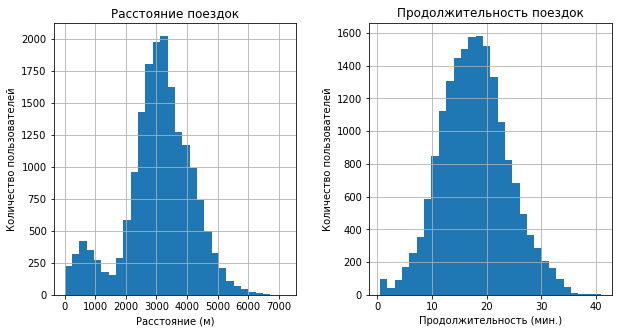

In [9]:
# построим гистаграммы для числовых столбцов таблицы 'data_rides' на одном графике.

#data_rides[['distance','duration']].hist(figsize=(10, 5)) 
#plt.show() 

axes = data_rides[['distance', 'duration']].hist(figsize=(10, 5), bins=30)
axes[0][0].set_title('Расстояние поездок')
axes[0][1].set_title('Продолжительность поездок')
axes[0][0].set_xlabel('Расстояние (м)')
axes[0][1].set_xlabel('Продолжительность (мин.)')
axes[0][0].set_ylabel('Количество пользователей')
axes[0][1].set_ylabel('Количество пользователей')
plt.grid()
plt.grid()
plt.show()

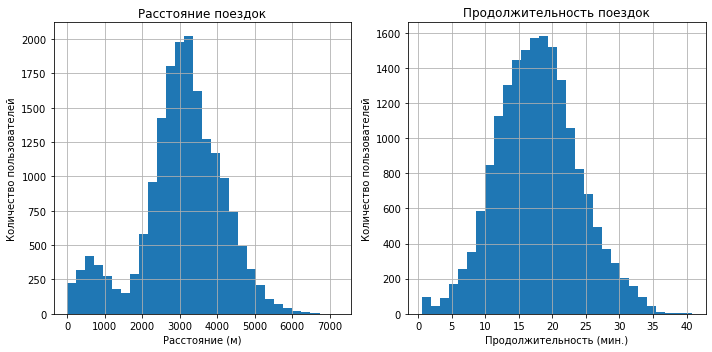

In [10]:
# Комментарий ревьюера 2
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
columns = ['distance', 'duration']
titles = ['Расстояние поездок', 'Продолжительность поездок']
xlabels = ['Расстояние (м)', 'Продолжительность (мин.)']

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    data_rides[col].hist(ax=ax, bins=30, grid=True)
    ax.set(title=title, xlabel=xlabel, ylabel='Количество пользователей')

plt.tight_layout()
plt.show()

In [11]:
data_sub.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [12]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Комментарии**

Полученные данные состоят из трех датафреймов. Первый мы сохранили в переменную `data_users`, в нем находится информация о пользователях сервиса самокатов GoFast (id пользователя, имя пользователя, возраст, город и тип подписки), пропусков в данных нет. Второй датафрейм мы сохранили в переменную `data_rides`, он содержит информацию о поезках (id пользователя, расстояние поездки, ее продолжительность и дата), пропусков также нет, но необходимо изменить тип данных в столбце `date`. Распределение данных `data_rides` в целом соответствует нормальному. Последний датафрейм содержит информацию о типах подписки и стоимости использования самокатов, пропусков нет, состоит он всего из 2 строк, его мы сохранили в переменную `data_sub`.


## Предобработка данных

### Приведем столбец date к типу даты pandas. 

In [13]:
# Преобразуем строку в datetime
data_rides['date'] = pd.to_datetime(data_rides['date'])

# Проверим
data_rides.info()
data_rides.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


### Создадим новый столбец с номером месяца на основе столбца date.

In [14]:
# Проверим уникальные значения годов в столбце 'date'

data_rides['date'].dt.year.unique()


array([2021])

In [15]:
# Добавляем столбец с месяцом

data_rides['date_month'] = data_rides['date'].dt.month  # месяц от 1 (январь) до 12 (декабрь)

# Выводим результат
data_rides.head(5)

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Проверим наличие пропущенных значений и дубликатов в датафреймах.

In [16]:
# Выведем количество пропущенных значений для каждого столбца.

print('Пропущенные значения в "data_users"')
data_users.isna().sum()

Пропущенные значения в "data_users"


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [17]:
# Выведем количество пропущенных значений для каждого столбца.

print('Пропущенные значения в "data_rides"')
data_rides.isna().sum()

Пропущенные значения в "data_rides"


user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [18]:
# Выведем количество пропущенных значений для каждого столбца.

print('Пропущенные значения в "data_sub"')
data_sub.isna().sum()

Пропущенные значения в "data_sub"


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Комментарии**

Пропущенных значений во всех датафреймах нет.


In [19]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме data_users:', data_users.duplicated().sum())
print('Количество явных дубликатов в датафрейме data_rides:', data_rides.duplicated().sum())
print('Количество явных дубликатов в датафрейме data_sub:', data_sub.duplicated().sum())

Количество явных дубликатов в датафрейме data_users: 31
Количество явных дубликатов в датафрейме data_rides: 0
Количество явных дубликатов в датафрейме data_sub: 0


In [20]:
# Удалим дубликаты в датафрейме data_users

data_users = data_users.drop_duplicates()

# Проверим результат

print('Количество явных дубликатов в датафрейме data_users:', data_users.duplicated().sum())

Количество явных дубликатов в датафрейме data_users: 0


In [21]:
# Сохраняем строки с поездками меньше 5 минут в новую переменную
short_rides = data_rides.loc[data_rides['duration'] < 5]

# Проверяем информацию
short_rides.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 280 to 17965
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     278 non-null    int64         
 1   distance    278 non-null    float64       
 2   duration    278 non-null    float64       
 3   date        278 non-null    datetime64[ns]
 4   date_month  278 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 13.0 KB


**Комментарии**

На этапе предобработки данных мы преобразовали данные в столбце `date` в датафрейме `data_rides` к типу даты pandas. Далее добавили дополнительный столбец `date_month` с номером месяца на основе столбца `date`. Следующим шагом проверили наличие явных дубликатов по всем трем датафреймам, обнаружилось 31 дубликат в датафрейме `data_rides`, которые мы удалили. Данные готовы к дальнейшему анализу.


## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках.

### Частота встречаемости городов.

In [23]:
# Сводная таблица для городов
pivot_city = data_users.pivot_table(
    index='city',
    values='user_id',
    aggfunc='count'
)
pivot_city = pivot_city.sort_values(by='user_id', ascending=False)

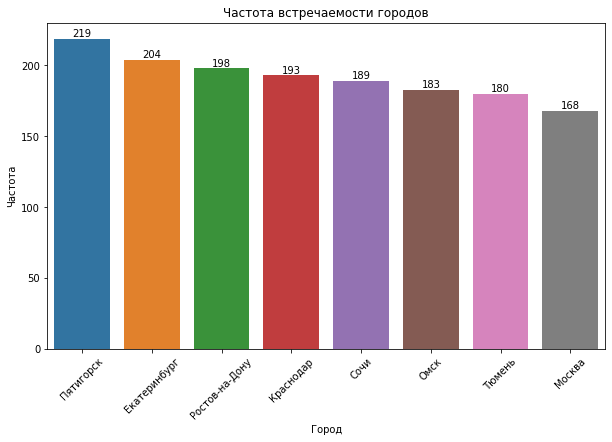

Количество городов: 8
Частота встречаемости городов


,Частота,Проценты
Город,,
Пятигорск,219,14.28
Екатеринбург,204,13.30
Ростов-на-Дону,198,12.91
Краснодар,193,12.58
Сочи,189,12.32
Омск,183,11.93
Тюмень,180,11.73
Москва,168,10.95


In [24]:
# График частоты встречаемости городов 

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=pivot_city.index, y=pivot_city['user_id'])
plt.title('Частота встречаемости городов')
plt.xlabel('Город')
plt.ylabel('Частота')
plt.xticks(rotation=45) # Поворачиваем метки по оси X для лучшей читаемости

# Добавляем значения над столбцами
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom')   
    
#plt.grid()
plt.show()

print('Количество городов:', pivot_city['user_id'].count())

# Добавляем колонку с процентами
city_sum = pivot_city['user_id'].sum()
pivot_city['Проценты'] = round((pivot_city['user_id'] / city_sum) * 100, 2)


# Переименование столбцов и индекса
pivot_city.rename(columns={'user_id': 'Частота'}, inplace=True)
pivot_city.index.names = ['Город']


print('Частота встречаемости городов')
display(pivot_city)

### Соотношение пользователей с подпиской и без подписки.

In [26]:
# Сводная таблица для пользователей с подпиской и без подписки
pivot_users = data_users.pivot_table(
    index='subscription_type',
    values='user_id',
    aggfunc='count'
)

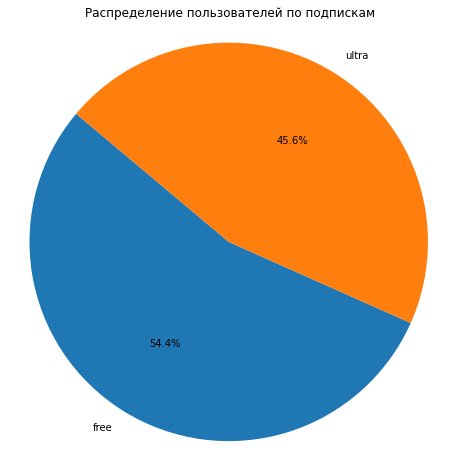

,Количество пользователей,Проценты
Тип подписки,,
free,835,54.43
ultra,699,45.57


In [27]:
# Данные для круговой диаграммы
labels = pivot_users.index.values
sizes = pivot_users['user_id'].values

# Рисуем круговую диаграмму оотношения пользователей с подпиской и без подписки.
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Круг должен быть правильным, а не эллипсом
plt.title("Распределение пользователей по подпискам")
plt.show()


# Добавляем колонку с процентами
users_sum = pivot_users['user_id'].sum()
pivot_users['Проценты'] = round((pivot_users['user_id'] / users_sum) * 100, 2)


# Переименование столбцов и индекса
pivot_users.rename(columns={'user_id': 'Количество пользователей'}, inplace=True)
pivot_users.index.names = ['Тип подписки']

display(pivot_users)

**Комментарии**

Согласно сводной таблицы пользователей без подписки больше, чем пользователей с подпиской, но различие в количестве не сильно большое \~10%.


### Возраст пользователей.

In [28]:
# Сводная таблица возраста пользователей 
pivot_age = data_users.pivot_table(
    index='age',
    values='user_id',
    aggfunc='count'
)
# Перенос индекса в основную таблицу
pivot_age = pivot_age.reset_index()


In [29]:
# Посмотрим сводную статистику 

pivot_age.describe()

,age,user_id
count,29.000000,29.000000
mean,26.103448,52.896552
std,8.706914,48.824280
min,12.000000,1.000000
25%,19.000000,9.000000
50%,26.000000,41.000000
75%,33.000000,93.000000
max,43.000000,145.000000


**Комментарии**

В датафрейме есть пользователи младше 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешен прокат самокатов с 14 лет, но при письменном согласии родителей. Проверим количество пользователей младше 14 лет и пользователей от 14 до 18 лет.


In [30]:
# Сохраняем строки с пользователями младше 14 лет в новую переменную
under_14 = pivot_age.loc[pivot_age['age'] < 14]

# Сохраняем строки с пользователями от 14 до 18 лет в новую переменную
under_18 = pivot_age.loc[(pivot_age['age'] >= 14) & (pivot_age['age'] < 18)]

# Проверяем информацию
print('Количество пользователей младше 14 лет:', len(under_14))
print('Количество пользователей от 14 до 18 лет:', len(under_18))
                                                     

Количество пользователей младше 14 лет: 2
Количество пользователей от 14 до 18 лет: 4


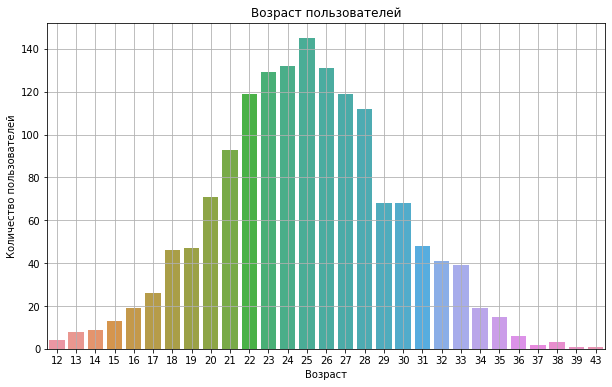

Возраст самого молодого пользователя: 12
Возраст самого взрослого пользователя: 43
Средний возраст пользователей: 26.103448275862068
Медиана возраста пользователей: 26.0


In [31]:
# График возраста пользователей 

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='user_id', data=pivot_age)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

# Выведем статистические показатели по возрасту пользователей

print('Возраст самого молодого пользователя:', pivot_age['age'].min())
print('Возраст самого взрослого пользователя:', pivot_age['age'].max())
print('Средний возраст пользователей:', pivot_age['age'].mean())
print('Медиана возраста пользователей:', pivot_age['age'].median())


**Комментарии**

Данные о возрасте пользователей сервиса аренды самокатов соответствуют нормальну распределению, средний возраст пользователей практически равен медианному - 26 лет. Самому молодому пользователю 12 лет, а самому взрослому 43. 



### Расстояние, которое пользователь преодолел за одну поездку.

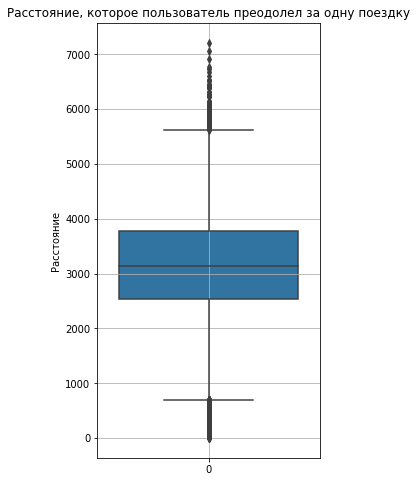

Самая короткая поездка: 0.855682925681208
Самая длинная поездка: 7211.007744598519
Среднее расстояние поездки: 3070.6599756818814
Медиана расстояния поездки: 3133.6099936787664
Межквартильный размах: 1232.9963753558854


In [33]:
# График для расстояния поездок

plt.figure(figsize=(4, 8))
sns.boxplot(data=data_rides['distance'])
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Расстояние')
plt.grid()
plt.show()


# Используем готовую функцию для расчёта IQR
iqr_distance = st.iqr(data_rides['distance'])

print('Самая короткая поездка:', data_rides['distance'].min())
print('Самая длинная поездка:', data_rides['distance'].max())
print('Среднее расстояние поездки:', data_rides['distance'].mean())
print('Медиана расстояния поездки:', data_rides['distance'].median())
print('Межквартильный размах:', iqr_distance)


**Комментарии**

Для визуализации данных использовали boxplot. Самая короткая поездка составила меньше метра, самая длинная 7,2 км. Среднее (3070 м) и медианное (3133 м) значения близки друг к другу, межквартильный размах составляем 1232 м. Основная масса поездок попадает в значения примерно от 2600 м до 3900 м, но на графике также присутствуют выбросы. 

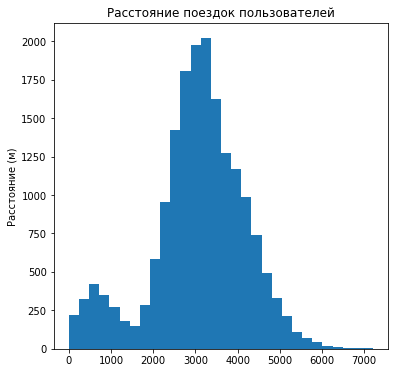

In [34]:
# График для расстояния поездок

data_rides['distance'].hist(bins=30, figsize=(6, 6))
plt.title('Расстояние поездок пользователей')
plt.ylabel('Расстояние (м)')
plt.grid()
plt.show()


### Продолжительность поездок.

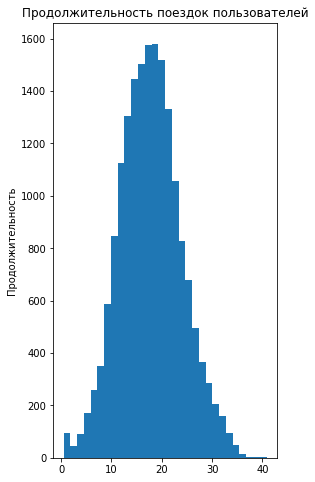

Самая короткая поездка: 0.5
Самая длинная поездка: 40.82396261922424
Средняя длительность поездки: 17.80501119798444
Медиана длительности поездки: 17.678394530393803


In [36]:
# График для продолжительности поездок

#plt.figure(figsize=(4, 8))
#sns.boxplot(data=pivot_duration)
data_rides['duration'].hist(bins=30, figsize=(4, 8))
plt.title('Продолжительность поездок пользователей')
plt.ylabel('Продолжительность')
plt.grid()
plt.show()


# Используем готовую функцию для расчёта IQR
#iqr_time = st.iqr(pivot_duration)

print('Самая короткая поездка:', data_rides['duration'].min())
print('Самая длинная поездка:', data_rides['duration'].max())
print('Средняя длительность поездки:', data_rides['duration'].mean())
print('Медиана длительности поездки:', data_rides['duration'].median())
#print('Межквартильный размах:', iqr_time)

**Комментарии**

Для визуализации использовали гистограмму. Самая короткая по времени поездка составила полминуты, самая длинная почти 41 мин. Среднее (17.8 мин) и медианное (17.6 мин) значения близки друг к другу, межквартильный размах составляем 3 мин. Основное количество поездок попадает в значения примерно от 12 мин до 23 мин, но на графике также присутствуют выбросы в сторону более длинных поездок. Также важно отметить на графике пик поездок менее минуты, они выглядят как аномалии, возможно это ошибка в приложении или неисправность самоката.


**Выводы**

В настоящем разделе мы изучили данные, описали и визуализировали информацию о пользователях и поездках. Всего сервис аренды самокатов GoFast представлен в 8 городах России. Наибольшее количество пользователей в Пятигорске (226), а наименьшее в Москве (172), хотя в целом распределение по городам примерно равномерно 11-14%. Типичный пользователь сервиса аренды самокатов GoFast это 26-летний пользователь без подписки, который совершает поездку длительностью 17 минут или 3 км. 

## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [37]:
# Объединим датафрейм с поездками с датафреймом с пользователями по столбцу 'user_id', воспользуемся методом merge().

data_all = data_rides.merge(data_users, on='user_id', how='left')

# Добавим к получившемуся датафрейму данные о подписках по столбцу 'subscription_type'

data_all = data_all.merge(data_sub, on='subscription_type', how='left')

# Проверим результат 
data_all.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [38]:
data_all.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### Создание дополнительных датафреймов. 

#### Данные о пользователях без подписки. 

In [39]:
# Создадим новые датафреймы двумя способами
# Первый с помощью метода query()

data_free = data_all.query("subscription_type == 'free'").reset_index(drop=True)

# Проверим результат
data_free.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11568 entries, 0 to 11567
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   date_month         11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.1+ MB


In [40]:
data_free.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


#### Данные о пользователях с подпиской.

In [41]:
# Второй способ - индексация

data_ultra = data_all[data_all['subscription_type'] == 'ultra'].reset_index(drop=True)

# Проверим результат

data_ultra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   distance           6500 non-null   float64       
 2   duration           6500 non-null   float64       
 3   date               6500 non-null   datetime64[ns]
 4   date_month         6500 non-null   int64         
 5   name               6500 non-null   object        
 6   age                6500 non-null   int64         
 7   city               6500 non-null   object        
 8   subscription_type  6500 non-null   object        
 9   minute_price       6500 non-null   int64         
 10  start_ride_price   6500 non-null   int64         
 11  subscription_fee   6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 609.5+ KB


In [42]:
data_ultra.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий.

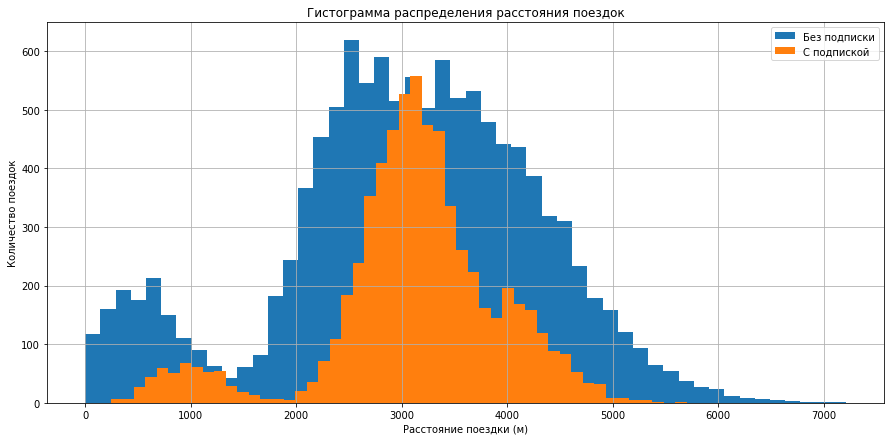

Самая короткая по расстоянию поездка для пользователей без подписки: 0.86
Самая короткая по расстоянию поездка для пользователей с подпиской: 244.21
Самая длинная по расстоянию поездка для пользователей без подписки: 7211.01
Самая длинная по расстоянию поездка для пользователей с подпиской: 5699.77
Среднее расстояние поездки для пользователей без подписки: 3045.5
Среднее расстояние поездки для пользователей с подпиской: 3115.45
Медиана расстояния поездки для пользователей без подписки: 3114.65
Медиана расстояния поездки для пользователей с подпиской: 3148.64


In [45]:
# Создание гистограмм для обеих категорий пользователей

plt.figure(figsize=(15, 7))
plt.hist(data_free['distance'], bins=50, label='Без подписки') 
plt.hist(data_ultra['distance'], bins=50, label='С подпиской') 

plt.legend()
plt.title('Гистограмма распределения расстояния поездок')
plt.xlabel('Расстояние поездки (м)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

print('Самая короткая по расстоянию поездка для пользователей без подписки:', data_free['distance'].min().round(2))
print('Самая короткая по расстоянию поездка для пользователей с подпиской:', data_ultra['distance'].min().round(2))
print('Самая длинная по расстоянию поездка для пользователей без подписки:', data_free['distance'].max().round(2))
print('Самая длинная по расстоянию поездка для пользователей с подпиской:', data_ultra['distance'].max().round(2))

print('Среднее расстояние поездки для пользователей без подписки:', data_free['distance'].mean().round(2))
print('Среднее расстояние поездки для пользователей с подпиской:', data_ultra['distance'].mean().round(2))

print('Медиана расстояния поездки для пользователей без подписки:', data_free['distance'].median().round(2))
print('Медиана расстояния поездки для пользователей с подпиской:', data_ultra['distance'].median().round(2))

**Комментарии**

Данные о распределении расстояния поездок пользователей с подпиской и без указывают, что в целом пользователи с подпиской совершают меньшее количество поездок, чем пользователи без подписки. Гистограмма распределения поездок пользователей с подпиской значительно меньше и полностью помещается внутрь гистограммы распределения пользователей без подписки. Сравнение самых коротких и самых длинных поездок показывает, что у пользователей без подписки больший размах данных. Медианы близки к среднему, что подтверждает, что данные не имеют значительных выбросов, а большинство поездок находятся в пределах 2-4 км. Медианные и средние расстояния для пользователей обеих категорий также примерно одинаковы, но у пользователей с подпиской они немного выше. 

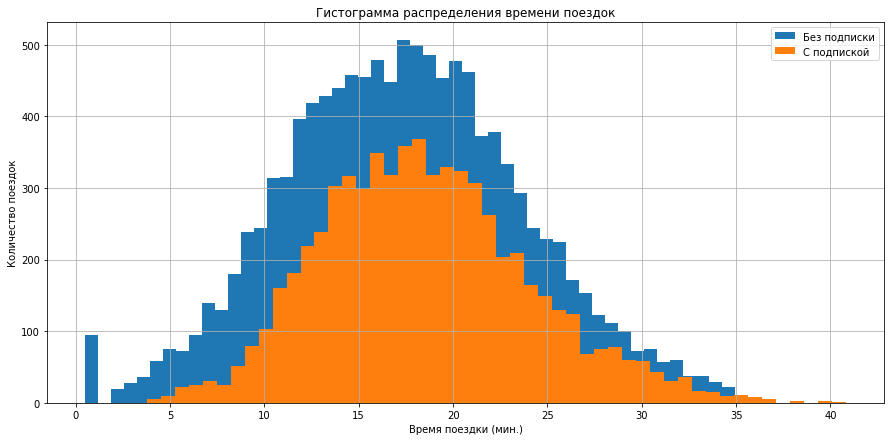

Самая короткая по времени поездка для пользователей без подписки: 0.5
Самая короткая по времени поездка для пользователей с подпиской: 3.76
Самая длинная по времени поездка для пользователей без подписки: 34.95
Самая длинная по времени поездка для пользователей с подпиской: 40.82
Среднее время поездки для пользователей без подписки: 17.39
Среднее время поездки для пользователей с подпиской: 18.54
Медиана время поездки для пользователей без подписки: 17.33
Медиана время поездки для пользователей с подпиской: 18.18


In [46]:
# Создание гистограмм для обеих категорий пользователей

plt.figure(figsize=(15, 7))
plt.hist(data_free['duration'], bins=50, label='Без подписки') 
plt.hist(data_ultra['duration'], bins=50, label='С подпиской') 

plt.legend()
plt.title('Гистограмма распределения времени поездок')
plt.xlabel('Время поездки (мин.)')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

print('Самая короткая по времени поездка для пользователей без подписки:', data_free['duration'].min().round(2))
print('Самая короткая по времени поездка для пользователей с подпиской:', data_ultra['duration'].min().round(2))
print('Самая длинная по времени поездка для пользователей без подписки:', data_free['duration'].max().round(2))
print('Самая длинная по времени поездка для пользователей с подпиской:', data_ultra['duration'].max().round(2))

print('Среднее время поездки для пользователей без подписки:', data_free['duration'].mean().round(2))
print('Среднее время поездки для пользователей с подпиской:', data_ultra['duration'].mean().round(2))

print('Медиана время поездки для пользователей без подписки:', data_free['duration'].median().round(2))
print('Медиана время поездки для пользователей с подпиской:', data_ultra['duration'].median().round(2))

**Комментарии**

Данные о распределении времени поездок пользователей с подпиской и без указывают, что в целом пользователи с подпиской совершают меньшее количество поездок, чем пользователи без подписки, но по форме распределение времени очень схоже. Гистограмма распределения поездок пользователей с подпиской немного меньше и полностью помещается внутрь гистограммы распределения пользователей без подписки. Сравнение самых коротких и самых длинных поездок показывает, что у пользователей без подписки больший размах данных. Медианы близки к среднему, что подтверждает, что данные не имеют значительных выбросов, а большинство поездок находятся в пределах 10-25 мин. Медианное и среднее время пользователей с подпиской больше примерно на 1 минуту времени  пользователей без подписки. Самая короткая по времени поездка для пользователей без подписки составила 0.5 минут. Это очень мало, возможно самокат был неисправен, или пользователь передумал ехать. Причем по графику заметно, что есть пик таких ультракоротких поездок, это выглядит подозрительно.

**Выводы**

В текущем разделе мы объединили данные о пользователях, поездках и подписках в один датафрейм. Затем создали два дополнительных датафрейма, чтобы разделить пользователей с подпиской и без и визуализировать данные о расстоянии и времени поездок для обеих категорий.

Пользователи без подписки имеют как более короткие, так и более длинные поездки по расстоянию по сравнению с подписчиками, но средние и медианные значения расстояний для обеих групп довольно близки.

Время поездок также показывает схожую тенденцию: подписчики имеют немного более продолжительные поездки, как в среднем, так и по медиане.


## Подсчёт выручки

### Создадим датафрейм с агрегированными данными о поездках 

In [47]:
# Дополнительно округлим значения расстояния поездок до двух знаков после точки

data_all['distance'] = data_all['distance'].round(2)
data_all['distance'].head(5)

0    4409.92
1    2617.59
2     754.16
3    2694.78
4    4028.69
Name: distance, dtype: float64

In [48]:
# Сначала каждое значение из столбца duration округляется с помощью «потолка»
# Затем изменяет тип данных на int

data_all['duration'] = np.ceil(data_all['duration']).astype(int) 

# Проверяем результат
data_all.head(5)

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.92,26,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.59,16,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.78,19,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.69,27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [49]:
# Агрегируем данные. 
# Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. 

data_revenue = data_all.groupby(['user_id', 'date_month']).agg(
    total_distance=('distance', 'sum'),
    total_duration=('duration', 'sum'),
    ride_count=('distance', 'count'),
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first')
).reset_index()


# Проверяем результат
data_revenue

,user_id,date_month,total_distance,total_duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.51,42,2,ultra,6,0,199
1,1,4,754.16,7,1,ultra,6,0,199
2,1,8,6723.47,46,2,ultra,6,0,199
3,1,10,5809.91,32,2,ultra,6,0,199
4,1,11,7003.50,56,3,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.47,26,2,free,8,50,0
11327,1534,8,7622.45,48,2,free,8,50,0
11328,1534,9,4928.17,23,1,free,8,50,0
11329,1534,11,13350.02,78,4,free,8,50,0


In [50]:
# Проверим наличие пропусков в сводной таблице 

data_revenue.isna().sum()

user_id              0
date_month           0
total_distance       0
total_duration       0
ride_count           0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

In [51]:
# Функция для расчета выручки

def calculate_revenue(row):
    return (row['start_ride_price'] * row['ride_count']) + (row['minute_price'] * row['total_duration']) \
    + row['subscription_fee'] 
    

In [52]:
# Добавляем новый столбец с данными о выручке

data_revenue['revenue'] =  data_revenue.apply(calculate_revenue, axis=1)

# Проверяем результат
data_revenue

,user_id,date_month,total_distance,total_duration,ride_count,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.51,42,2,ultra,6,0,199,451
1,1,4,754.16,7,1,ultra,6,0,199,241
2,1,8,6723.47,46,2,ultra,6,0,199,475
3,1,10,5809.91,32,2,ultra,6,0,199,391
4,1,11,7003.50,56,3,ultra,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.47,26,2,free,8,50,0,308
11327,1534,8,7622.45,48,2,free,8,50,0,484
11328,1534,9,4928.17,23,1,free,8,50,0,234
11329,1534,11,13350.02,78,4,free,8,50,0,824


In [53]:
# Проверяем общую выручку за год

data_revenue['revenue'].sum()

3878641

In [54]:
# Агрерируем таблицу выручки по разным категориям пользователей по месяцам 

sub_revenue = data_revenue.groupby(['date_month', 'subscription_type']).agg(
    total_revenue=('revenue', 'sum')
).reset_index()

sub_revenue

,date_month,subscription_type,total_revenue
0,1,free,193850
1,1,ultra,144108
2,2,free,165856
3,2,ultra,124572
4,3,free,187214
5,3,ultra,142608
6,4,free,185598
7,4,ultra,137318
8,5,free,188030
9,5,ultra,149235


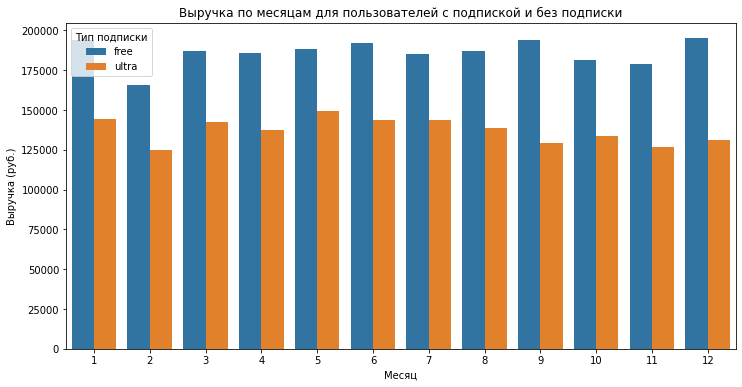

Итого выручка за год для пользователей без подписки: 2234104
Итого выручка за год для пользователей c подпиской: 1644537


In [55]:
# Создаем график для визуализации

plt.figure(figsize=(12, 6))
sns.barplot(data=sub_revenue, x='date_month', y='total_revenue', hue='subscription_type')
plt.title('Выручка по месяцам для пользователей с подпиской и без подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка (руб.)')
plt.legend(title='Тип подписки')
plt.show()

print('Итого выручка за год для пользователей без подписки:', \
      sub_revenue.loc[sub_revenue['subscription_type'] == 'free', 'total_revenue'].sum())
print('Итого выручка за год для пользователей c подпиской:', \
      sub_revenue.loc[sub_revenue['subscription_type'] == 'ultra', 'total_revenue'].sum())

**Комментарии**

Проанализировав и визуализировав данные по выручке от пользователей с подпиской и без, можно сделать вывод, что доход от пользователей без подписки (2 234 104 руб.) значительно выше, чем от пользователей с подпиской (1 644 537 руб.), разница составляет более 25%. 

**Выводы**

В настоящем разделе мы создали датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. В этот же датафрейм добавили столбец с помесячной выручкой, которую принёс каждый пользователь. Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. Далее мы создали датафрейм, в котором посчитали выручку по месяцам для каждого типа пользователей. В итоге получилось, что пользователи без подписки приносят больше дохода для сервиса, чем пользователи с подпиской.

## Проверка гипотез

*Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.*

###  Гипотеза 1. Пользователи с подпиской тратят больше времени на поездки.

*Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.*



*Н₀ (нулевая гипотеза)*: пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки.

*Н₁ (альтернативная гипотеза)*:  пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [57]:
# Проводим t-тест для проверки гипотезы

alpha = 0.05  # уровень статистической значимости


results_h1 = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')

print('p-значение:', results_h1.pvalue)

if results_h1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 
    


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу: пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки.


**Комментарии**

Мы отвергаем гипотезу, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. P-значение, равное 1.2804098316645618e-34, представляет собой очень маленькое число. Низкое p-значение указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, крайне мала. Таким образом, пользователи с подпиской не могут быть «выгоднее» для компании. 


###  Гипотеза 2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

*Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.* 

*Н₀ (нулевая гипотеза)*: пользователи с подпиской в среднем проезжают за одну поездку 3130 метров.

*Н₁ (альтернативная гипотеза)*: пользователи с подпиской в среднем проезжают за одну поездку больше 3130 метров.

In [58]:
# Проводим t-тест для проверки гипотезы

alpha = 0.05  # уровень статистической значимости
interested_value_h2 = 3130 # столько метров должны проезжать пользователи

results_h2 = st.ttest_1samp(data_ultra['distance'], interested_value_h2, alternative='greater')

print('p-значение:', results_h2.pvalue)

if results_h2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: пользователи с подпиской в среднем проезжают за одну поездку 3130 метров.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 


p-значение: 0.9195368847849785
Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.


**Комментарии**

Отвергнуть гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров, мы не можем. Высокое p-значение (0.919) указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, очень высокая. Также это подтверждается на данных среднее расстояние поездок (3071 м) и медианное (3133 м). Таким образом, можно сказать, что пользователи с подпиской в среднем проезжают оптимальное с точки зрения износа самоката расстояние в 3130 метров. 


### Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

*Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.* 

*Н₀ (нулевая гипотеза)*: помесячная выручка от пользователей с подпиской и от пользователей без подписки не отличается.

*Н₁ (альтернативная гипотеза)*: помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [59]:
# Проводим t-тест для проверки гипотезы

# Отбираем данные для анализа, сохраняем их в разные переменные 

ultra = data_revenue[data_revenue['subscription_type'] == 'ultra']['revenue']
free = data_revenue[data_revenue['subscription_type'] == 'free']['revenue']

alpha = 0.05  # уровень статистической значимости

results_h3 = st.ttest_ind(ultra, free, alternative='greater')

print('p-значение:', results_h3.pvalue)

if results_h3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской и от пользователей без подписки не отличается.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу: помесячная выручка от пользователей с подпиской и от пользователей без подписки не отличается.


**Комментарии**

Мы отвергаем гипотезу, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. P-значение, равное 1.8850394384715216e-31, представляет собой очень маленькое число. Низкое p-значение указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, крайне мала. Также в разделе 5 мы проверили распределение выручки на данных и визуализировали разницу. Выручка от пользователей без подписки выше, чем от пользователей с подпиской.


### Гипотеза 4. Количество обращений в техподдержку снизилось после обновления сервера, с которыми взаимодействует мобильное приложение.  

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобится бы для проверки этой гипотезы?*

**Комментарии**

Для проверки гипотезы о том, что количество обращений в техподдержку снизилось после обновления сервера, нам потребуется провести t-тест для зависимых (парных) выборок. Этот тест подходит, потому что у нас есть две связанные выборки: количество обращений до обновления и количество обращений после обновления для одних и тех же пользователей. Для проверки гипотезы мы будем использовать метод `scipy.stats.ttest_rel(alternative='less')`.

*Н₀ (нулевая гипотеза)*: количество обращений в техподдержку после обновления сервера не изменилось.

*Н₁ (альтернативная гипотеза)*: количество обращений в техподдержку снизилось после обновления сервера.



**Вывод**

В настоящем разделе мы проверили три гипотезы с помощью статистического t-теста для двух разных выборок, и одностороннюю гипотезу для одной выборки.  
Мы отвергли две гипотезы:
- Гипотеза 1. Пользователи с подпиской тратят больше времени на поездки. 
- Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Отвергнуть гипотезу 2 (среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров) мы не можем. Высокое p-значение (0.922) указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, очень высокая. Это также подтверждается на данных.

Также мы ответили на вопрос касательно выбора теста для проверки гипотезы 4 (количество обращений в техподдержку снизилось после обновления сервера). Для проверки этой гипотезы нам потребуется провести t-тест для зависимых (парных) выборок.

## Вывод

Для настоящего проекта нам были предоставлены данные сервиса аренды самокатов GoFast. Наша задача — проанализировать данные и проверить ряд гипотез, которые могут помочь бизнесу вырасти. 

В первом разделе проекта мы изучили общую информацию о данных. Нам для анализа были предоставлены три датафрейма: `data_users`(информация о пользователях сервиса самокатов GoFast - 1565 entries), `data_rides` (информация о поезках - 18068 entries) и `data_sub` (информация о типах подписки). Числовые данные имеют нормальное распределение, пропусков нет. 

Во втором разделе проекта мы провели основную предобработку данных в датафреймах. Так как пропущенных значений в датафреймах не было, то потребовалось удалить только явные дубликаты в датафрейме `data_users`. Дополнительно мы привели столбец `date` к типу даты pandas, и создали новый столбец с номером месяца на основе столбца `date`.

В третьем разделе проекта мы провели исследовательский анализ данных, который включал изучение следующих параметров:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.
Всего сервис аренды самокатов GoFast представлен в 8 городах России. Наибольшее количество пользователей в Пятигорске (226), а наименьшее в Москве (172), хотя в целом распределение по городам примерно равномерно 11-14%. Типичный пользователь сервиса аренды самокатов GoFast это 26-летний пользователь без подписки, который совершает поездку длительностью 17 минут или 3 км.
Важно отметить, что среди пользователей некоторым менее 18 лет, именно с этого возраста разрешен прокат самокатов. В некоторых компаниях и регионах разрешено с 14 лет, но при письменном согласии родителей. В датасете минимальный возраст 12 лет, это явное нарушение существующих норм. Вероятно, необходимо доработать проверку возраста пользователя про регистрации в приложении, чтобы обезопасить бизнес со стороны контроллирующих органов. Кроме того, существует ряд аномалий с длительностью и расстоянием поездок, например, поездки в 0.5 минут с дальностью более 4000 метров. Возможно такие аномалии указывают на неисправность самокатов или проблему с геолокацией в приложении.


В четвертом разделе проекта мы объединили данные о пользователях, поездках и подписках в один датафрейм. Затем создали два дополнительных датафрейма, чтобы разделить пользователей с подпиской и без и визуализировать данные о расстоянии и времени поездок для обеих категорий. Таким образом, мы выяснили, что пользователи без подписки имеют как более короткие, так и более длинные поездки по расстоянию по сравнению с подписчиками, но средние и медианные значения расстояний для обеих групп довольно близки. Время поездок также показывает схожую тенденцию: подписчики имеют немного более продолжительные поездки, как в среднем, так и по медиане.

В пятом разделе мы создали датафрейм с агрегированными данными о поездках и нашли суммарное расстояние, количество поездок, суммарное время и помесячную выручку для каждого пользователя за каждый месяц. Проанализировав и визуализировав данные по выручке от пользователей с подпиской и без, можно сделать вывод, что доход от пользователей без подписки значительно выше, чем от пользователей с подпиской, разница составляет более 25%. 

В шестом разделе мы проверили с помощью статистического t-теста ряд гипотез для проведения различных акций с целью увеличения количества пользователей с подпиской в будущем. 
- Гипотеза 1. Пользователи с подпиской тратят больше времени на поездки.
- Гипотеза 2. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.
- Гипотеза 3. Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
Мы отвергли гипотезы 1 и 3, но отвергнуть гипотезу 2 мы не можем. Отвергнутые гипотезы подтвержаются данными, изученными в разделе 3.

Таким образом, получившийся анализ данных сервиса аренды самокатов GoFast может быть полезным для всех участников рынка, включая работников сервиса и самих пользователей, и поможет в принятии более обоснованных решений по изменению сервиса в будущем.